In [87]:
from topsis import Topsis
import numpy as np
import pandas as pd

df = pd.read_excel("base_fiis.xlsx")
df.head()

,fii,segmento,tipo_anbima,valor_atual,variacao_valor_atual,dividend_yield,valorização_12m,pvp,caixa,cnpj_fii,administrador,cnpj_administrador,liquidez_diaria_media,participação_ifix,tx_adm,vacancia
0,KNCR11,Papéis,Títulos e Valores Mobiliários,101.66,0.0085,11.72,0.0967,1.00,6.99,16.706.958/0001-32,INTRAG DTVM LTDA.,62.418.140/0001-31,10473828.91,6.942,0.0099,0.000
1,KNIP11,Papéis,Títulos e Valores Mobiliários,87.34,0.0098,12.11,-0.0192,0.96,1.74,24.960.430/0001-13,INTRAG DTVM LTDA.,62.418.140/0001-31,6498485.43,5.357,0.0103,0.000
2,XPML11,Shoppings,Renda,96.30,0.0052,11.43,-0.1249,0.82,6.44,28.757.546/0001-00,XP INVESTIMENTOS CCTVM S.A.,02.332.886/0001-04,11569337.48,4.081,0.0050,0.034
3,HGLG11,Imóveis Industriais e Logísticos,Renda,149.35,0.0087,8.84,-0.0684,0.92,1.24,11.728.688/0001-47,PLURAL S.A. BANCO MÚLTIPLO,45.246.410/0001-55,6045463.30,3.865,0.0047,0.067
4,BTLG11,Imóveis Industriais e Logísticos,Renda,95.76,0.0080,9.74,-0.0235,0.92,13.86,11.839.593/0001-09,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,59.281.253/0001-23,6469756.39,3.172,0.0069,0.020


In [88]:
# df_tratado = df[['dividend_yield', 'valor_atual', 'pvp', 'caixa']].apply(lambda x: x.str.replace(',','.').astype("float"))
df_indicadores = df[['fii','dividend_yield', 'pvp','liquidez_diaria_media','vacancia','tx_adm','valorização_12m', 'caixa']]
df_indicadores['dividend_yield'] = df_indicadores['dividend_yield']/100
evaluation_matrix = df_indicadores.iloc[:,1:].values
evaluation_matrix

C:\Users\eduar\AppData\Local\Temp\ipykernel_25872\491396600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicadores['dividend_yield'] = df_indicadores['dividend_yield']/100


array([[ 1.17200000e-01,  1.00000000e+00,  1.04738289e+07,
         0.00000000e+00,  9.90000000e-03,  9.67000000e-02,
         6.99000000e+00],
       [ 1.21100000e-01,  9.60000000e-01,  6.49848543e+06,
         0.00000000e+00,  1.03000000e-02, -1.92000000e-02,
         1.74000000e+00],
       [ 1.14300000e-01,  8.20000000e-01,  1.15693375e+07,
         3.40000000e-02,  5.00000000e-03, -1.24900000e-01,
         6.44000000e+00],
       [ 8.84000000e-02,  9.20000000e-01,  6.04546330e+06,
         6.70000000e-02,  4.70000000e-03, -6.84000000e-02,
         1.24000000e+00],
       [ 9.74000000e-02,  9.20000000e-01,  6.46975639e+06,
         2.00000000e-02,  6.90000000e-03, -2.35000000e-02,
         1.38600000e+01],
       [ 1.27500000e-01,  9.80000000e-01,  1.01688559e+07,
         0.00000000e+00,  7.50000000e-03, -5.85000000e-02,
         2.21000000e+00],
       [ 8.94000000e-02,  8.30000000e-01,  5.29958661e+06,
         2.78000000e-02,  1.23000000e-02, -1.35800000e-01,
         2.6100000

In [89]:
df_indicadores.head()

,fii,dividend_yield,pvp,liquidez_diaria_media,vacancia,tx_adm,valorização_12m,caixa
0,KNCR11,0.1172,1.00,10473828.91,0.000,0.0099,0.0967,6.99
1,KNIP11,0.1211,0.96,6498485.43,0.000,0.0103,-0.0192,1.74
2,XPML11,0.1143,0.82,11569337.48,0.034,0.0050,-0.1249,6.44
3,HGLG11,0.0884,0.92,6045463.30,0.067,0.0047,-0.0684,1.24
4,BTLG11,0.0974,0.92,6469756.39,0.020,0.0069,-0.0235,13.86


### CRITÉRIOS

| Indicador              | Conservador | Moderado | Arrojado |
|------------------------|-------------|----------|----------|
| Dividend Yield         | 0,15        | 0,20     | 0,30     |
| P/VP                   | 0,10        | 0,15     | 0,15     |
| Liquidez               | 0,15        | 0,15     | 0,10     |
| Taxa de Vacância       | 0,25        | 0,15     | 0,05     |
| Custos Administrativos | 0,15        | 0,10     | 0,05     |
| Valorização (12 meses) | 0,05        | 0,15     | 0,30     |
| Caixa do FII           | 0,15        | 0,10     | 0,05     |

In [90]:

pesos_conservador = [0.15, 0.10, 0.15, 0.25, 0.15, 0.05, 0.15]
pesos_moderado = [0.20, 0.15, 0.15, 0.15, 0.10, 0.15, 0.10]
pesos_arrojado = [0.30, 0.15, 0.10, 0.05, 0.05, 0.30, 0.05]
# weights = [5, 5, 9, 0]
'''
if higher value is preferred - True
if lower value is preferred - False
'''
criterias = np.array([True, False, True, False, False, True, True])

t = Topsis(evaluation_matrix, pesos_arrojado, criterias)

t.calc()

print("best_distance\t", t.best_distance)
print("worst_distance\t", t.worst_distance)

# print("weighted_normalized",t.weighted_normalized)

print("worst_similarity\t", t.worst_similarity)
print("rank_to_worst_similarity\t", t.rank_to_worst_similarity())

print("best_similarity\t", t.best_similarity)
print("rank_to_best_similarity\t", t.rank_to_best_similarity())


Step 1
 [[ 1.17200000e-01  1.00000000e+00  1.04738289e+07  0.00000000e+00
   9.90000000e-03  9.67000000e-02  6.99000000e+00]
 [ 1.21100000e-01  9.60000000e-01  6.49848543e+06  0.00000000e+00
   1.03000000e-02 -1.92000000e-02  1.74000000e+00]
 [ 1.14300000e-01  8.20000000e-01  1.15693375e+07  3.40000000e-02
   5.00000000e-03 -1.24900000e-01  6.44000000e+00]
 [ 8.84000000e-02  9.20000000e-01  6.04546330e+06  6.70000000e-02
   4.70000000e-03 -6.84000000e-02  1.24000000e+00]
 [ 9.74000000e-02  9.20000000e-01  6.46975639e+06  2.00000000e-02
   6.90000000e-03 -2.35000000e-02  1.38600000e+01]
 [ 1.27500000e-01  9.80000000e-01  1.01688559e+07  0.00000000e+00
   7.50000000e-03 -5.85000000e-02  2.21000000e+00]
 [ 8.94000000e-02  8.30000000e-01  5.29958661e+06  2.78000000e-02
   1.23000000e-02 -1.35800000e-01  2.61000000e+00]
 [ 1.03000000e-01  8.60000000e-01  3.77207400e+06  3.50000000e-02
   8.90000000e-03 -1.55600000e-01  6.92000000e+00]
 [ 1.04400000e-01  7.90000000e-01  3.28217043e+06  5.400

In [91]:

pesos_conservador = [0.15, 0.10, 0.15, 0.25, 0.15, 0.05, 0.15]
pesos_moderado = [0.20, 0.15, 0.15, 0.15, 0.10, 0.15, 0.10]
pesos_arrojado = [0.30, 0.15, 0.10, 0.05, 0.05, 0.30, 0.05]
perfis = {'Conservador':pesos_conservador, 'Moderado':pesos_moderado, 'Arrojado':pesos_arrojado}
resultados = {
    
}


'''
if higher value is preferred - True
if lower value is preferred - False
'''
criterias = np.array([True, False, True, False, False, True, True])

for perfil, pesos in perfis.items():
    t = Topsis(evaluation_matrix, pesos, criterias)
    print(perfil)
    t.calc()
    print("rank_to_best_similarity\t", t.rank_to_best_similarity())
    resultados[perfil]= t.worst_similarity


Conservador
Step 1
 [[ 1.17200000e-01  1.00000000e+00  1.04738289e+07  0.00000000e+00
   9.90000000e-03  9.67000000e-02  6.99000000e+00]
 [ 1.21100000e-01  9.60000000e-01  6.49848543e+06  0.00000000e+00
   1.03000000e-02 -1.92000000e-02  1.74000000e+00]
 [ 1.14300000e-01  8.20000000e-01  1.15693375e+07  3.40000000e-02
   5.00000000e-03 -1.24900000e-01  6.44000000e+00]
 [ 8.84000000e-02  9.20000000e-01  6.04546330e+06  6.70000000e-02
   4.70000000e-03 -6.84000000e-02  1.24000000e+00]
 [ 9.74000000e-02  9.20000000e-01  6.46975639e+06  2.00000000e-02
   6.90000000e-03 -2.35000000e-02  1.38600000e+01]
 [ 1.27500000e-01  9.80000000e-01  1.01688559e+07  0.00000000e+00
   7.50000000e-03 -5.85000000e-02  2.21000000e+00]
 [ 8.94000000e-02  8.30000000e-01  5.29958661e+06  2.78000000e-02
   1.23000000e-02 -1.35800000e-01  2.61000000e+00]
 [ 1.03000000e-01  8.60000000e-01  3.77207400e+06  3.50000000e-02
   8.90000000e-03 -1.55600000e-01  6.92000000e+00]
 [ 1.04400000e-01  7.90000000e-01  3.2821704

In [92]:
df_resultados = pd.DataFrame(resultados)
df_resultados = df_indicadores[['fii']].join(df_resultados)
print(df_resultados)
df_resultados.to_excel("resultados_topsis.xlsx", index=False)

       fii  Conservador  Moderado  Arrojado
0   KNCR11     0.797126  0.798339  0.842232
1   KNIP11     0.710486  0.682311  0.688084
2   XPML11     0.723143  0.644027  0.503114
3   HGLG11     0.543197  0.542845  0.570457
4   BTLG11     0.808100  0.729873  0.674673
5   MXRF11     0.735617  0.694717  0.631487
6   KNRI11     0.647480  0.561138  0.450099
7   XPLG11     0.670450  0.558258  0.418494
8   VISC11     0.614819  0.539216  0.459984
9   KNHY11     0.697093  0.677912  0.743315
10  HGRU11     0.667677  0.593764  0.516294
11  IRDM11     0.702600  0.632900  0.583228
12  HGBS11     0.597782  0.503470  0.368865
13  PVBI11     0.287615  0.295012  0.287774
14  CPTS11     0.690883  0.610299  0.463974
15  TRXF11     0.719845  0.666688  0.660532
16  RECR11     0.700034  0.648976  0.646090
17  TGAR11     0.587948  0.463391  0.230912
18  KNSC11     0.737245  0.703693  0.740306
19  KNHF11     0.748352  0.617434  0.455076


In [93]:
print("Coeficientes de Similaridade com a Melhor Solução:")
for i, value in enumerate(t.best_similarity):
    print(f"Alternativa {i+1}: {value}")

print("\nRanking baseado na melhor similaridade:")
ranking = t.rank_to_best_similarity()
for i, rank in enumerate(ranking):
    print(f"Posição {i+1}: Alternativa {rank}")


Coeficientes de Similaridade com a Melhor Solução:
Alternativa 1: 0.157768325396679
Alternativa 2: 0.3119164347387386
Alternativa 3: 0.4968856008798256
Alternativa 4: 0.4295428331970397
Alternativa 5: 0.3253270635755607
Alternativa 6: 0.36851315054668565
Alternativa 7: 0.5499005872507491
Alternativa 8: 0.5815056420154938
Alternativa 9: 0.5400161406684679
Alternativa 10: 0.25668457346734347
Alternativa 11: 0.4837060002944323
Alternativa 12: 0.41677190077513787
Alternativa 13: 0.6311351454243594
Alternativa 14: 0.7122255076085664
Alternativa 15: 0.5360263745568944
Alternativa 16: 0.33946806126675927
Alternativa 17: 0.3539095485555348
Alternativa 18: 0.7690884180318632
Alternativa 19: 0.2596937367511064
Alternativa 20: 0.5449242682856335

Ranking baseado na melhor similaridade:
Posição 1: Alternativa 1
Posição 2: Alternativa 10
Posição 3: Alternativa 19
Posição 4: Alternativa 2
Posição 5: Alternativa 5
Posição 6: Alternativa 16
Posição 7: Alternativa 17
Posição 8: Alternativa 6
Posição 9:

In [94]:
print("Coeficientes de Similaridade com a Melhor Solução:")
for i, value in enumerate(t.worst_similarity):
    print(f"Alternativa {i+1}: {value}")

print("\nRanking baseado na melhor similaridade:")
ranking = t.rank_to_best_similarity()
for i, rank in enumerate(ranking):
    print(f"Posição {i+1}: Alternativa {rank}")


Coeficientes de Similaridade com a Melhor Solução:
Alternativa 1: 0.8422316746033209
Alternativa 2: 0.6880835652612615
Alternativa 3: 0.5031143991201744
Alternativa 4: 0.5704571668029603
Alternativa 5: 0.6746729364244394
Alternativa 6: 0.6314868494533145
Alternativa 7: 0.45009941274925086
Alternativa 8: 0.41849435798450624
Alternativa 9: 0.4599838593315322
Alternativa 10: 0.7433154265326565
Alternativa 11: 0.5162939997055678
Alternativa 12: 0.5832280992248621
Alternativa 13: 0.3688648545756406
Alternativa 14: 0.28777449239143355
Alternativa 15: 0.4639736254431057
Alternativa 16: 0.6605319387332407
Alternativa 17: 0.6460904514444652
Alternativa 18: 0.23091158196813677
Alternativa 19: 0.7403062632488936
Alternativa 20: 0.4550757317143666

Ranking baseado na melhor similaridade:
Posição 1: Alternativa 1
Posição 2: Alternativa 10
Posição 3: Alternativa 19
Posição 4: Alternativa 2
Posição 5: Alternativa 5
Posição 6: Alternativa 16
Posição 7: Alternativa 17
Posição 8: Alternativa 6
Posição 9

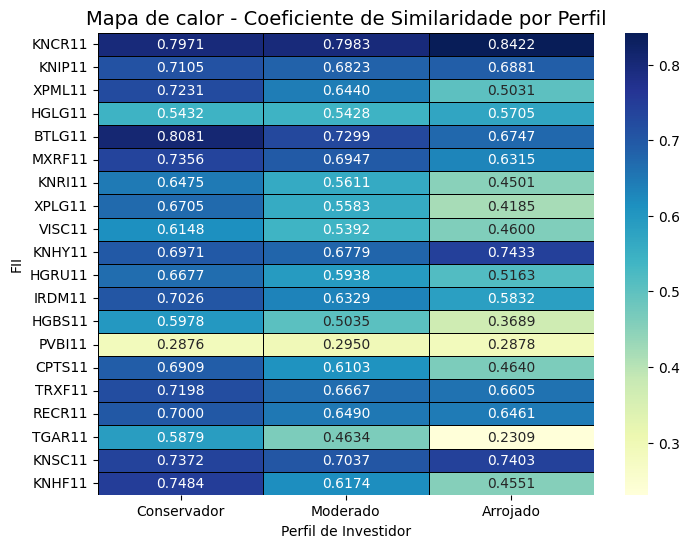

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a planilha de resultados TOPSIS
df_resultado = pd.read_excel("resultados_topsis.xlsx")

# Definindo o índice como FII para o heatmap
df_heatmap = df_resultado.set_index('fii')[['Conservador', 'Moderado', 'Arrojado']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=0.5, linecolor='black')

plt.title('Mapa de calor - Coeficiente de Similaridade por Perfil', size=14)
plt.xlabel('Perfil de Investidor')
plt.ylabel('FII')
plt.savefig("heatmap_topsis.png")
plt.show()


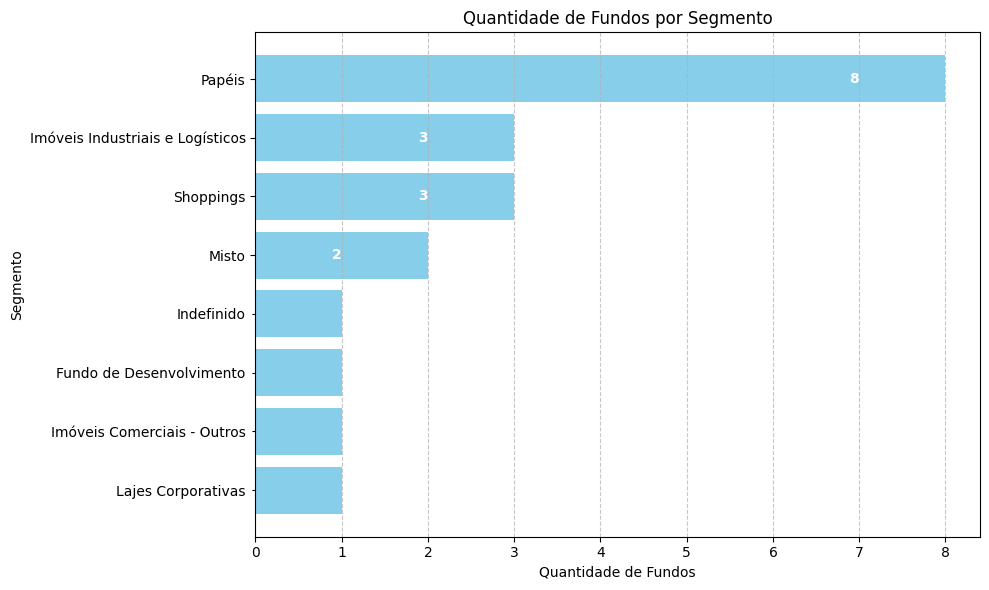

In [103]:
# Contar a quantidade de fundos por segmento
segmento_counts = df['segmento'].value_counts(ascending=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(segmento_counts.index, segmento_counts.values, color='skyblue')

# Adicionar rótulos de dados dentro das barras
for bar in bars:
    plt.text(
        bar.get_width() - 1,  # Posição X (ajustado para ficar dentro da barra)
        bar.get_y() + bar.get_height() / 2,  # Posição Y centralizada
        f'{int(bar.get_width())}',  # Texto do rótulo
        va='center', 
        ha='right',  # Alinhado à direita para ficar dentro da barra
        color='white',
        fontweight='bold'
    )

# Ajustar o gráfico
plt.xlabel('Quantidade de Fundos')
plt.ylabel('Segmento')
plt.title('Quantidade de Fundos por Segmento')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("barras_segmento.png")
plt.show()

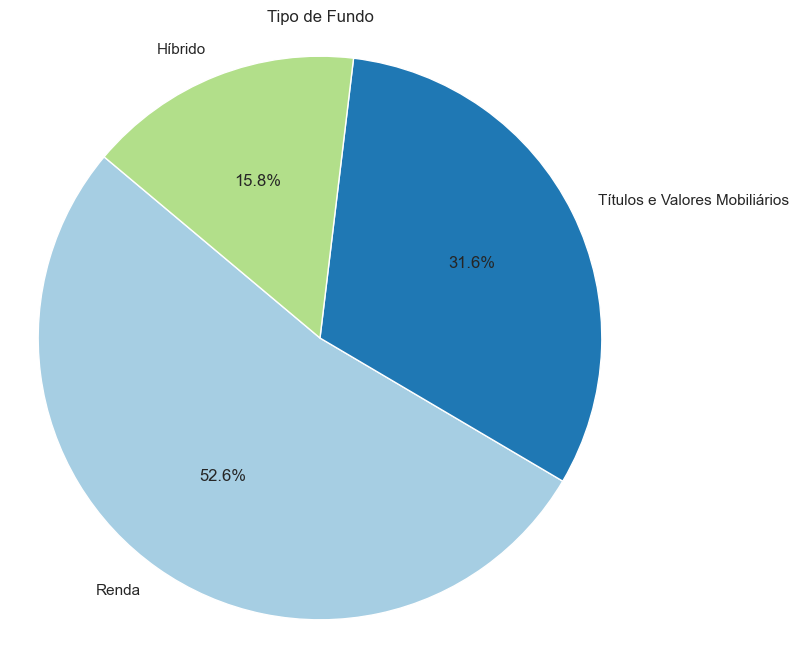

In [116]:
# Contar a quantidade por tipo_anbima
# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")
tipo_anbima_counts = df['tipo_anbima'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    tipo_anbima_counts.values, 
    labels=tipo_anbima_counts.index, 
    autopct='%1.1f%%',  # Exibir percentual com uma casa decimal
    startangle=140,     # Iniciar o gráfico em um ângulo para melhor visualização
    colors=plt.cm.Paired.colors,  # Paleta de cores
    # wedgeprops={'edgecolor': 'black'}  # Bordas pretas para destacar cada fatia
)

plt.title('Tipo de Fundo')
plt.savefig("pizza_tipo_anbima.png")
plt.axis('equal')  # Garante que o gráfico seja um círculo perfeito
plt.show()